In [1]:
import pandas as pd

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
df = pd.read_csv('http://bit.ly/digital_ad_sales_csv')

In [3]:
df.head()

,audience_id,search,display,social,sales
0,370202,9204.0,1512.0,2768.0,22100.0
1,172422,1780.0,1572.0,1804.0,10400.0
2,323144,688.0,1836.0,2772.0,9300.0
3,422335,6060.0,1652.0,2340.0,18500.0
4,194985,7232.0,432.0,2336.0,12900.0


In [4]:
df.isnull().sum()

audience_id    0
search         1
display        3
social         0
sales          0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

audience_id    0
search         0
display        0
social         0
sales          0
dtype: int64

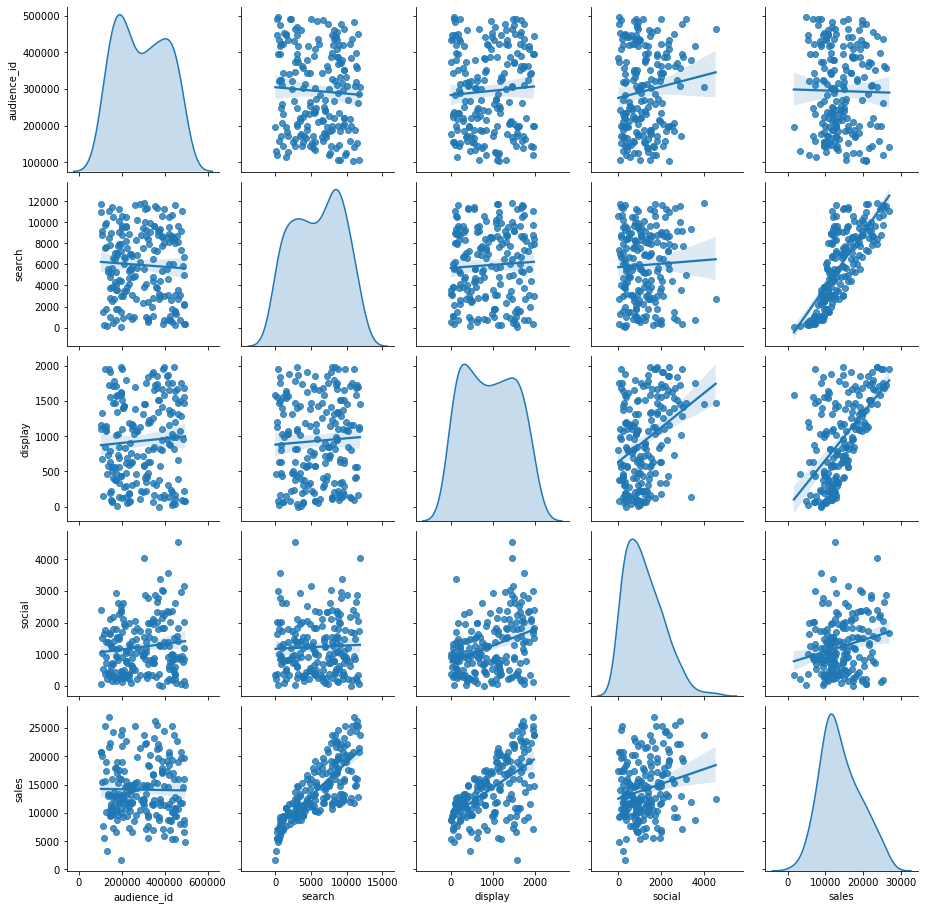

In [7]:
sns.pairplot(df, kind='reg', diag_kind='kde')

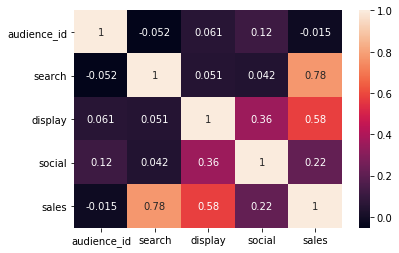

In [8]:
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns, 
            yticklabels=df.corr().columns,
            annot=True)

---

# search, display, social

In [9]:
X = df[['search','display','social']]
y = df['sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
predictions = model.predict(X_test)
predictions

array([18419.65967615, 16204.60813735, 13062.62439091, 11998.3488396 ,
        9971.13771049,  6034.97327661, 20889.71607176, 21196.77565124,
        9857.61601055, 11850.34735505, 12346.18946595, 20702.46172583,
       10917.21988551,  5735.25715395, 12910.75179389, 15178.08430118,
       23079.20322806, 12464.11211669,  9883.28808227,  8311.27458927,
       13684.06299331, 21200.75936739, 19369.12752594, 15058.43685636,
       15222.86862283, 11894.59706539, 21918.38123545, 12129.28255331,
       21495.84645841, 18739.30351726, 10139.71929212,  6784.59277972,
       16888.53576479,  8084.38405818,  9677.74570553, 16272.63644053,
        8533.07525577, 14022.04710832, 13504.90080396,  4482.93296348])

In [13]:
# R-squared
r2 = model.score(X_train, y_train)
r2

0.887349087701715

In [14]:
# number of observations
n = X_train.shape[0]
n

156

In [15]:
# number of independent variables
p = X_train.shape[1]
p

3

In [16]:
# adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p -1)
adj_r2

0.8851257144326699

In [17]:
# mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
mse

2056964.4851590693

In [18]:
# root mean squared error
rmse = sqrt(mse)
rmse

1434.2121478913325

In [19]:
pd.DataFrame([model.coef_], columns = X.columns, index=['Coef']).T

,Coef
search,1.130980
display,4.623676
social,0.075939


---

# search, display

In [20]:
X = df[['search','display']]
y = df['sales']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
predictions = model.predict(X_test)
predictions

array([18302.07245371, 16263.99774312, 12824.25395489, 11842.36965486,
        9959.1917064 ,  6034.93583284, 20932.22082973, 21146.58476261,
        9887.27208143, 11882.38556459, 12326.26417698, 20671.27489169,
       10980.09515639,  5728.64562418, 12856.6638217 , 15196.08646134,
       23078.19052114, 12465.73552283,  9855.34677232,  8364.88763893,
       13759.75059445, 21097.40033332, 19487.61211851, 15055.72893313,
       15111.32485849, 11943.63375868, 22041.15166574, 12094.35091092,
       21471.24831335, 18808.81358316, 10126.24205113,  6793.43622929,
       16935.72403147,  8102.56491033,  9707.13012542, 16217.22744375,
        8500.42640019, 14057.69368434, 13524.37375814,  4476.67795327])

In [24]:
# number of observations
n = X_train.shape[0]
n

156

In [25]:
# number of independent variables
p = X_train.shape[1]
p

2

In [26]:
# R-squared
r2 = model.score(X_train, y_train)
r2

0.8872151432072454

In [27]:
# mean squared error
mse = metrics.mean_squared_error(y_test, predictions)
mse

2004745.8159159657

In [28]:
# root mean squared error
rmse = sqrt(mse)
rmse

1415.8904674853793

In [29]:
pd.DataFrame([model.coef_], columns = X.columns, index=['Coef']).T

,Coef
search,1.132138
display,4.658978
